In [3]:
import pandas as pd
import numpy as np

# fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [2]:
## Fill missing values with scikit-learn
car_missing = pd.read_csv('../Data/CSVs/car-sales-missing-data.csv')
print(car_missing.isna().sum())

# drop the rows with no label (the value you're calculating)
car_missing.dropna(subset=['Price'], inplace=True)
car_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64


Make        1
Colour      1
Odometer    3
Doors       0
Price       0
dtype: int64

In [3]:
# make x and y
x = car_missing.drop("Price", axis=1)
y = car_missing['Price']
print(car_missing.columns)

Index(['Make', 'Colour', 'Odometer', 'Doors', 'Price'], dtype='object')


In [4]:
# Fill categorical values with 'missing' and numerica with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer']

# create an imputer (and fill the missing data with it)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# transform data
filled_x = imputer.fit_transform(x)
filled_x

array([['Toyota', 'White', 4.0, 150043.0],
       ['Honda', 'Red', 4.0, 87899.0],
       ['Toyota', 'Blue', 3.0, 98763.2],
       ['BMW', 'Black', 5.0, 11179.0],
       ['Nissan', 'White', 4.0, 213095.0],
       ['Toyota', 'Green', 4.0, 98763.2],
       ['Honda', 'missing', 4.0, 98763.2],
       ['missing', 'White', 4.0, 31600.0]], dtype=object)

In [13]:
car_sales_filled = pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors", "Odometer"])
car_sales_filled

,Make,Colour,Doors,Odometer
0,Toyota,White,4.0,150043.0
1,Honda,Red,4.0,87899.0
2,Toyota,Blue,3.0,98763.2
3,BMW,Black,5.0,11179.0
4,Nissan,White,4.0,213095.0
5,Toyota,Green,4.0,98763.2
6,Honda,missing,4.0,98763.2
7,missing,White,4.0,31600.0


In [14]:
car_sales_filled.isna().sum()

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(filled_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

ValueError: could not convert string to float: 'Toyota'

### 2.1 Pick a ML model for regression problem

In [43]:
# get cali housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [44]:
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
housing_df['MedHouseVal'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
#import algo
from sklearn.linear_model import Ridge
#setup random seed
np.random.seed(42)
#create data
x = housing_df
y = housing['target'] # med house price in $100,000s

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

model = Ridge()
model.fit(xtrain, ytrain)

# check the score of the model on the test set
model.score(xtest, ytest) # predictive accuracy on scale from [0, 1]
# coefficient of determination (R-squared value).

0.5758549611440126

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5)
lasso.fit(xtrain, ytrain)
model.score(xtest,ytest)

0.5758549611440126

In [5]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(xtrain, ytrain)
svr.score(xtest, ytest)

NameError: name 'xtrain' is not defined

In [38]:
print('why the fuck isnt this working')

why the fuck isnt this working


## 2.2 Looking into Classification Models

In [18]:
heart = pd.read_csv('../Data/CSVs/heart-disease.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# predict if patient will or will not get heart disease
len(heart)

303

In [ ]:
# try linearSVC, recommended by the map!

In [13]:
from sklearn.svm import LinearSVC
np.random.seed(42)

x = heart.drop('target', axis=1)
y = heart['target']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

clf = LinearSVC(max_iter=10000)
clf.fit(xtrain, ytrain)

clf.score(xtest, ytest)

C:\Users\Brandon Carr\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [14]:
# look at the target column (it is something, or it IS this thing, or ITS that thing, etc. etc...)
# this target column has 0 OR 1. So we classify based on those values.. BINARY classification
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [30]:
# when we switched to ensemble method, had more success
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart.drop('target', axis=1)
y = heart['target']

xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(xtrain, ytrain)

clf.score(xtest, ytest)

1.0

## 3. Fit the model/algorithm to the data and use it to make preidictions


### 3.1 Fitting the model to the data

In [32]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart.drop('target', axis=1)
y = heart['target']

xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.2)

clf = RandomForestClassifier()

# fit the data to the model (training the machine learning model)
clf.fit(xtrain, ytrain)

clf.score(xtest, ytest)

0.3333333333333333

### 3.3 Make predictions using the model

2 ways to make the predictions

1. use 'predict()'
2. predict_proba()

In [35]:
ypreds = clf.predict(xtest)
ypreds

array([1, 1, 1], dtype=int64)

In [34]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3


In [36]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(ytest, ypreds)

0.3333333333333333

# Make predictions with predict_proba()

In [40]:
# predict_proba() returns possabilities of a classification label
clf.predict_proba(xtest)

array([[0.4 , 0.6 ],
       [0.44, 0.56],
       [0.49, 0.51]])

### so based on the xtest data for the rows provided, the algorithm is returns the probability for the set of classification labels.

#### so in this case, for row 1: 0.4 (or 40%) sure the sample will have heart disease, 0.6 (or 60% sure) the sample will get heart disease.

In [47]:
# 'predict()' on regression models
# import this from up above if you re-run later.
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create data
x = housing_df.drop('target', axis=1)
y = housing_df['target']

# split into train/test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

#instantiate and fit model
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

# make a prediction
ypreds = model.predict(xtest)



In [50]:
ypreds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [51]:
np.array(ytest[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [53]:
# Compare predictions to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, ypreds)

0.32659871732073664

In [1]:
housing_df['preds'] = yp

NameError: name 'yp' is not defined

## Evaluating a machine learning model

three ways to evaluate sci-kit learn models/estimators:
    1. Estimators build-in .score method
    2. The 'scoring' parameter
    3. Problem-specific metric functions

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

# load DF
df = pd.read_csv('../Data/CSVs/heart-disease.csv')

# create X and Y
x = df.drop('target', axis=1)
y = df['target']

# Create train/test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=(0.2))

# Create classifier model
clf = RandomForestClassifier()

# Fit classifier to training data
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [9]:
clf.score(xtrain, ytrain)

1.0

In [10]:
clf.score(xtest, ytest)

0.8524590163934426

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

heart_disease = pd.read_csv('../Data/CSVs/heart-disease.csv')

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
clf.fit(xtrain, ytrain)
tmp = cross_val_score(clf, x, y, cv=5)

In [19]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(tmp) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.15%


In [15]:
# ROC = Receiver operating characteristic curve (AUC/ROC)

In [16]:
# ROC = comparison between true positive rate (tpr) vs false positive rate (fpr).

In [21]:
from sklearn.metrics import roc_curve

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=(0.2))

y_probs = clf.predict_proba(xtest)
y_probs[:10]

array([[0.56, 0.44],
       [0.26, 0.74],
       [0.02, 0.98],
       [0.98, 0.02],
       [0.9 , 0.1 ],
       [0.04, 0.96],
       [0.98, 0.02],
       [0.9 , 0.1 ],
       [0.97, 0.03],
       [0.85, 0.15]])

In [22]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.44, 0.74, 0.98, 0.02, 0.1 , 0.96, 0.02, 0.1 , 0.03, 0.15, 0.08,
       0.93, 0.81, 0.85, 0.99, 0.11, 0.93, 0.19, 0.48, 0.98, 0.46, 0.01,
       0.27, 0.86, 0.01, 0.18, 0.1 , 1.  , 0.96, 0.03, 0.06, 1.  , 0.99,
       0.91, 0.51, 0.92, 0.99, 0.01, 0.87, 0.34, 0.14, 0.04, 1.  , 0.99,
       0.85, 0.03, 0.02, 1.  , 0.01, 0.75, 0.99, 0.64, 0.98, 0.96, 0.08,
       0.72, 0.04, 0.97, 0.95, 0.11, 0.88])

In [27]:
fpr, tpr, thresholds = roc_curve(ytest, y_probs_positive)
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.28571429, 0.35714286, 0.46428571, 0.53571429,
        0.57142857, 0.64285714, 0.85714286, 1.        ]),
 array([0.        , 0.12121212, 0.27272727, 0.33333333, 0.36363636,
        0.45454545, 0.48484848, 0.54545455, 0.6969697 , 0.75757576,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.93, 0.86, 0.85, 0.46,
        0.14, 0.11, 0.1 , 0.08, 0.06, 0.04, 0.02, 0.01]))

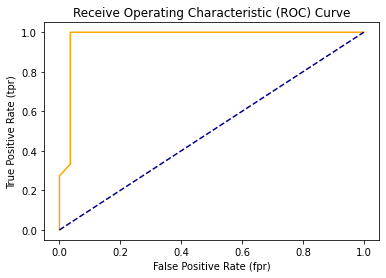

In [28]:
import matplotlib.pyplot as plt


def plot_roc_curve(fpr, tpr):
    """
        Plots a ROC curve given the flase positive rate and true positive rate of a model
    """
    
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receive Operating Characteristic (ROC) Curve")
    
plot_roc_curve(fpr, tpr)

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ytest, y_probs_positive)

0.9751082251082251